# CM3070-Final Year Project-Deep Learning on Pneumonia ChestXray dataset

## Project Template- CM3015 Machine Learning and Neural Networks

### Project Idea Title 1: Deep Learning on a public dataset

#### Loading and Labeling Chest X-ray Image Categories

In the code below,this section of the code loads the path containing the data and gives the categories labels. Two categories comprise the problem: 'NORMAL' and 'PNEUMONIA'. A.DS_Store file, a hidden file made by macOS rather than a category, is also included in the code. These entries are given numerical names by the code, where 0 denotes.DS_Store, 1 PNEUMONIA, and 2 NORMAL.

In [1]:
import cv2 as cv

import os

imageDirectory = 'ChestXrayImages'

varietySets = os.listdir(imageDirectory)

class_tags = [i for i in range (len(varietySets))]


class_tag_map = {}

for i in range (len(varietySets)):
    
    class_tag_map[varietySets[i]] = class_tags[i]

print(varietySets)
print(class_tags)
print(class_tag_map)  

['.DS_Store', 'PNEUMONIA', 'NORMAL']
[0, 1, 2]
{'.DS_Store': 0, 'PNEUMONIA': 1, 'NORMAL': 2}


#### Processing and Labeling Chest X-ray Images

In the code below,
Chest X-ray images are loaded from designated directories, processed to grayscale, resized to 128 by 128 pixels, and given numerical labels ('PNEUMONIA' and 'NORMAL') to the various categories. The labeled processed images are kept in a list known as datacollection.

Here is where we get the images ready for processing in the code. After reading the images, we resize them, turn them into grayscale, and add them to the empty Python list. To eliminate distorted visuals, an exception handling mechanism is incorporated. When an exception arises while processing, it is reported to the console.

In [2]:
import os
import cv2 as cv

# Decide on the size you want your image to be
visualScale = 128

# Create a list at first to hold the processed picture data
datacollection = []

# Describe the data categories
varietySets = ['PNEUMONIA', 'NORMAL']  

# Link categories with numerical labels
class_tag_map = {'PNEUMONIA': 0, 'NORMAL': 1}  

# Directory in which image data is contained
imageDirectory = 'ChestXrayImages'  

for varietySet in varietySets:
    folderPath = os.path.join(imageDirectory, varietySet)
    
    # Check if folderPath is a directory
    if not os.path.isdir(folderPath):
        
        continue
    
    file_names = os.listdir(folderPath)

    # Iterate over all files in the current directory
    for file_name in file_names:
        
        imagePath = os.path.join(folderPath, file_name)
        
        # Skip .DS_Store and other non-image files
        if file_name == '.DS_Store' or not os.path.isfile(imagePath):
            
            continue
        
        image = cv.imread(imagePath)
        
        try:
            # Convert, resize and append the image data
            gray_scale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            adjusted_image = cv.resize(gray_scale, (visualScale, visualScale))
            datacollection.append([adjusted_image, class_tag_map[varietySet]])

        #Print any exceptions that come up when processing the image
        except Exception as e:
            print(e)

####  Shuffling Dataset for Balanced Training

The dataset's elements are shuffled by this code and kept in the datacollection list. The random module's shuffle function is used to shuffle the list's components in a random order. Before training a machine learning model, this step is frequently carried out to randomly arrange the data samples. This can assist avoid the model from picking up trends based on the data sample order.

In [3]:
# Shuffle elements in data set
from random import shuffle

shuffle(datacollection)

In the code below, 
Record and endGoal are two empty lists that are initialized by this code. Every feature-label pair in the data collection is iterated over, adding features to the record and labels to the final goal. This method efficiently divides features and labels for additional processing.

In [4]:
# Initialize empty list to store record and endGoal
record = []
endGoal = []

# Iterate each feature-label pair in datacollection
for feature,label in datacollection:
    
    record.append(feature)
    endGoal.append(label)
    

#### Data Preprocessing and One-Hot Encoding for Neural Network Training

In the code below,
The data is preprocessed by the code to make it compatible with grayscale images by reshaping and scaling it between 0 and 1. After that, one-hot encoding is applied to the target labels, which have now been converted to numpy arrays. The result verifies the one-hot encoded labels and the data shapes.

In [5]:
import numpy as np
from keras.utils import np_utils

# Scale the data between 0 and 1 to normalize it
record = np.array(record) / 255.0
print("Normalized record shape:", record.shape)

# Reshape the data(for grayscale images)
visualScale = record.shape[1]  
record = np.reshape(record, (record.shape[0], visualScale, visualScale, 1))
print("Reshaped record shape:", record.shape)

# Convert target to numpy array
endGoal = np.array(endGoal)
print("endGoal shape:", endGoal.shape)

# One-hot encode the target labels
newendGoal = np_utils.to_categorical(endGoal)
print("One-hot encoded endGoal shape:", newendGoal.shape)

# Printing shapes to verify
print("Record shape:", record.shape)
print("EndGoal shape:", endGoal.shape)
print("One-hot encoded endGoal shape:", newendGoal.shape)

2024-05-30 10:40:14.933588: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Normalized record shape: (5856, 128, 128)
Reshaped record shape: (5856, 128, 128, 1)
endGoal shape: (5856,)
One-hot encoded endGoal shape: (5856, 2)
Record shape: (5856, 128, 128, 1)
EndGoal shape: (5856,)
One-hot encoded endGoal shape: (5856, 2)


#### Saving Processed Data and Labels as .npy Files

In the code below, This code snippet creates two.npy files, "dataChestXray.npy" and "targetChestXray.npy," for the preprocessed data (record) and the one-hot encoded labels (newendGoal). This makes it simple to save and retrieve processed data for use in machine learning activities in the future.

In [6]:
# Save record and newendGoal as .npy filename
np.save('dataChestXray',record)
np.save('targetChestXray',newendGoal)

#### Loading Processed Data

In the code below, This function loads the one-hot encoded labels (endGoal) and preprocessed data (record) from the stored.npy files. The'record' array's shape, which does not include the first dimension, is then printed, showing the image's dimensions (128x128 pixels with 1 channel).

In [7]:
import numpy as np

# Load data from the saved .npy files
record = np.load('dataChestXray.npy')
endGoal = np.load('targetChestXray.npy')

# Print the'record' array, excluding the first dimension
print(record.shape[1:])

(128, 128, 1)


#### CNN Model

In the code below, This code builds and sets up a Convolutional Neural Network (CNN) model for image categorization using Keras. Multiple convolutional and pooling layers are the first layers in the model, followed by fully linked layers. It assembles the model using the Adam optimizer and a categorical cross-entropy loss function. A thorough overview of the model architecture, including layer types, output forms, and the quantity of trainable parameters, is provided in the output.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

# Using Keras, this code creates and assembles a CNN model for picture classification.

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = record.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                        

#### Splitting Data into Training and Testing Sets

This code snippet divides the data (record) and labels (endGoal) into training and testing sets in an 80:20 ratio using scikit-learn's train_test_split function. The data and labels required for training and testing the machine learning model are contained in the ensuing arrays, train_record, test_record, train_endGoal, and test_endGoal.

In [9]:
from sklearn.model_selection import train_test_split

# Divide the target arrays and data into training and testing sets in an 80:20 ratio
train_record,test_record,train_endGoal,test_endGoal = train_test_split(record,endGoal,test_size = 0.2)

#### Training CNN Model

In the code below, Using the labels (train_endGoal) and training data (train_record), this code trains the CNN model (model) across ten epochs. It prints the accuracy and loss metrics for every epoch during training. The model's training progress throughout the designated number of iterations is indicated via the output, which shows the loss and accuracy values for each epoch.

In [10]:
# After ten epochs of training the model with the training data, store the training history
trainHist = model.fit(train_record, train_endGoal, epochs=10)

Epoch 1/10
147/147 [==============================] - 21s 139ms/step - loss: 0.5781 - accuracy: 0.7483
Epoch 2/10
147/147 [==============================] - 21s 146ms/step - loss: 0.3069 - accuracy: 0.8640
Epoch 3/10
147/147 [==============================] - 22s 152ms/step - loss: 0.2567 - accuracy: 0.8977
Epoch 4/10
147/147 [==============================] - 23s 154ms/step - loss: 0.2382 - accuracy: 0.9058
Epoch 5/10
147/147 [==============================] - 23s 156ms/step - loss: 0.2278 - accuracy: 0.9129
Epoch 6/10
147/147 [==============================] - 23s 157ms/step - loss: 0.2085 - accuracy: 0.9184
Epoch 7/10
147/147 [==============================] - 23s 157ms/step - loss: 0.2004 - accuracy: 0.9268
Epoch 8/10
147/147 [==============================] - 23s 158ms/step - loss: 0.2007 - accuracy: 0.9227
Epoch 9/10
147/147 [==============================] - 23s 158ms/step - loss: 0.1812 - accuracy: 0.9334
Epoch 10/10
147/147 [==============================] - 23s 159ms/step - l

#### Plotting Accuracy and Loss Graphs

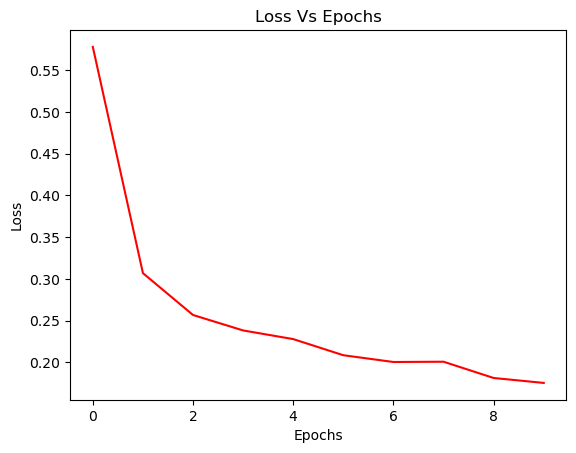

In [11]:
# Using Matplotlib, plot the training loss over epochs
from matplotlib import pyplot as plt

plt.plot(trainHist.history['loss'], color = 'red')  
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

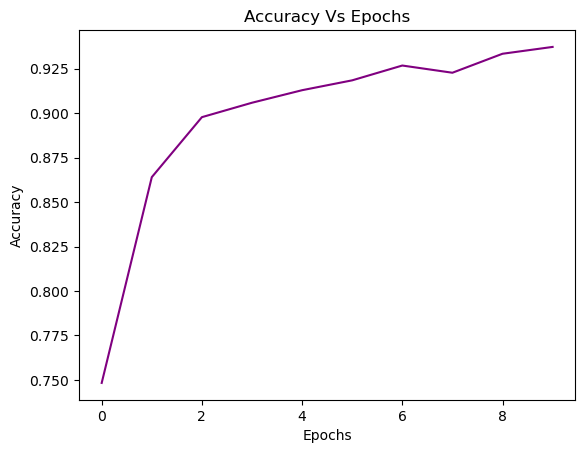

In [12]:
# Plot the accuracy over epochs

plt.plot(trainHist.history['accuracy'], color='purple') 
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Evaluating CNN Model Performance

In the code below, The code assesses how well the trained CNN model (model) performs with respect to the test dataset (test_record) and associated labels (test_endGoal). According to the result, the model performed accurately on the test data with an approximate loss of 0.1728 and an approximate accuracy of 94.20%. These numbers shed light on the model's ability to produce precise predictions and how well it generalizes to new data.

In [13]:
# Print the result metrics after evaluating the model using the test data
print(model.evaluate(test_record,test_endGoal))

37/37 [==============================] - 2s 42ms/step - loss: 0.1728 - accuracy: 0.9420
[0.17283086478710175, 0.9419795274734497]


#### Analyzing Model Performance with Confusion Matrix and Classification Report

This method predicts labels (dataPred) based on test records (test_record), hence evaluating the trained model's performance on the test dataset. In order to create a confusion matrix (conf_mat), it then translates the true labels (test_endGoal) and anticipated labels (classPred) into integer format. Using Seaborn's heatmap, the confusion matrix is shown, showing the model's predictions against the real labels. <br>

Confusion Matrix:<br>

The confusion matrix indicates that the model correctly predicted 846 instances of 'PNEUMONIA' and 302 instances of 'NORMAL', while misclassifying 44 instances of 'PNEUMONIA' and 24 instances of 'NORMAL'.<br>
Classification Report:<br>

For 'PNEUMONIA' class:<br>
Precision: 0.97 (97% of predicted 'PNEUMONIA' were actually 'PNEUMONIA')<br>
Recall: 0.95 (95% of actual 'PNEUMONIA' were predicted correctly)<br>
F1-score: 0.96<br>
Support: 846 (total instances of 'PNEUMONIA')<br>
For 'NORMAL' class:<br>
Precision: 0.88 (88% of predicted 'NORMAL' were actually 'NORMAL')<br>
Recall: 0.92 (92% of actual 'NORMAL' were predicted correctly)<br>
F1-score: 0.90<br>
Support: 326 (total instances of 'NORMAL')<br>
Overall Metrics:<br>

Accuracy: 0.94 (94% of all predictions were correct)<br>
Macro Average F1-score: 0.93<br>
Weighted Average F1-score: 0.94<br>

37/37 [==============================] - 2s 42ms/step


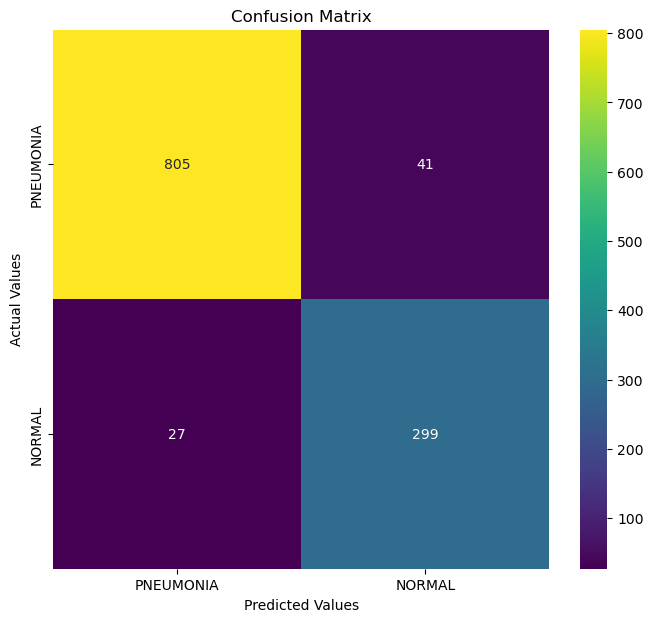

              precision    recall  f1-score   support

   PNEUMONIA       0.97      0.95      0.96       846
      NORMAL       0.88      0.92      0.90       326

    accuracy                           0.94      1172
   macro avg       0.92      0.93      0.93      1172
weighted avg       0.94      0.94      0.94      1172



In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Predicting on test record
dataPred = model.predict(test_record)
classPred = np.argmax(dataPred, axis = 1)

#Converting into integer labels
true_labels = np.argmax(test_endGoal, axis = 1)

#Generate the confusion matrix
conf_mat = confusion_matrix(true_labels, classPred)

#Visualize the confusion matrix
plt.figure(figsize=(8, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels = varietySets, yticklabels = varietySets)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print the classification report
print(classification_report(true_labels, classPred, target_names = varietySets))

#### Visualizing Test Images with True and Predicted Labels

A function called showImg is defined in this code to show a collection of test images along with their true and predicted labels. Next, given the test data (test_record and test_endGoal), predictions (dataPred) and actual labels (true_labels) are obtained. Lastly, it uses the defined function to show a set of test photos with the appropriate true and anticipated labels.
<br>
A grid of test images is displayed in the output, each with its true label (ground truth) and the label the model predicted next to it. This visual aid facilitates comprehension of the model's classification performance across several image categories.


37/37 [==============================] - 2s 41ms/step


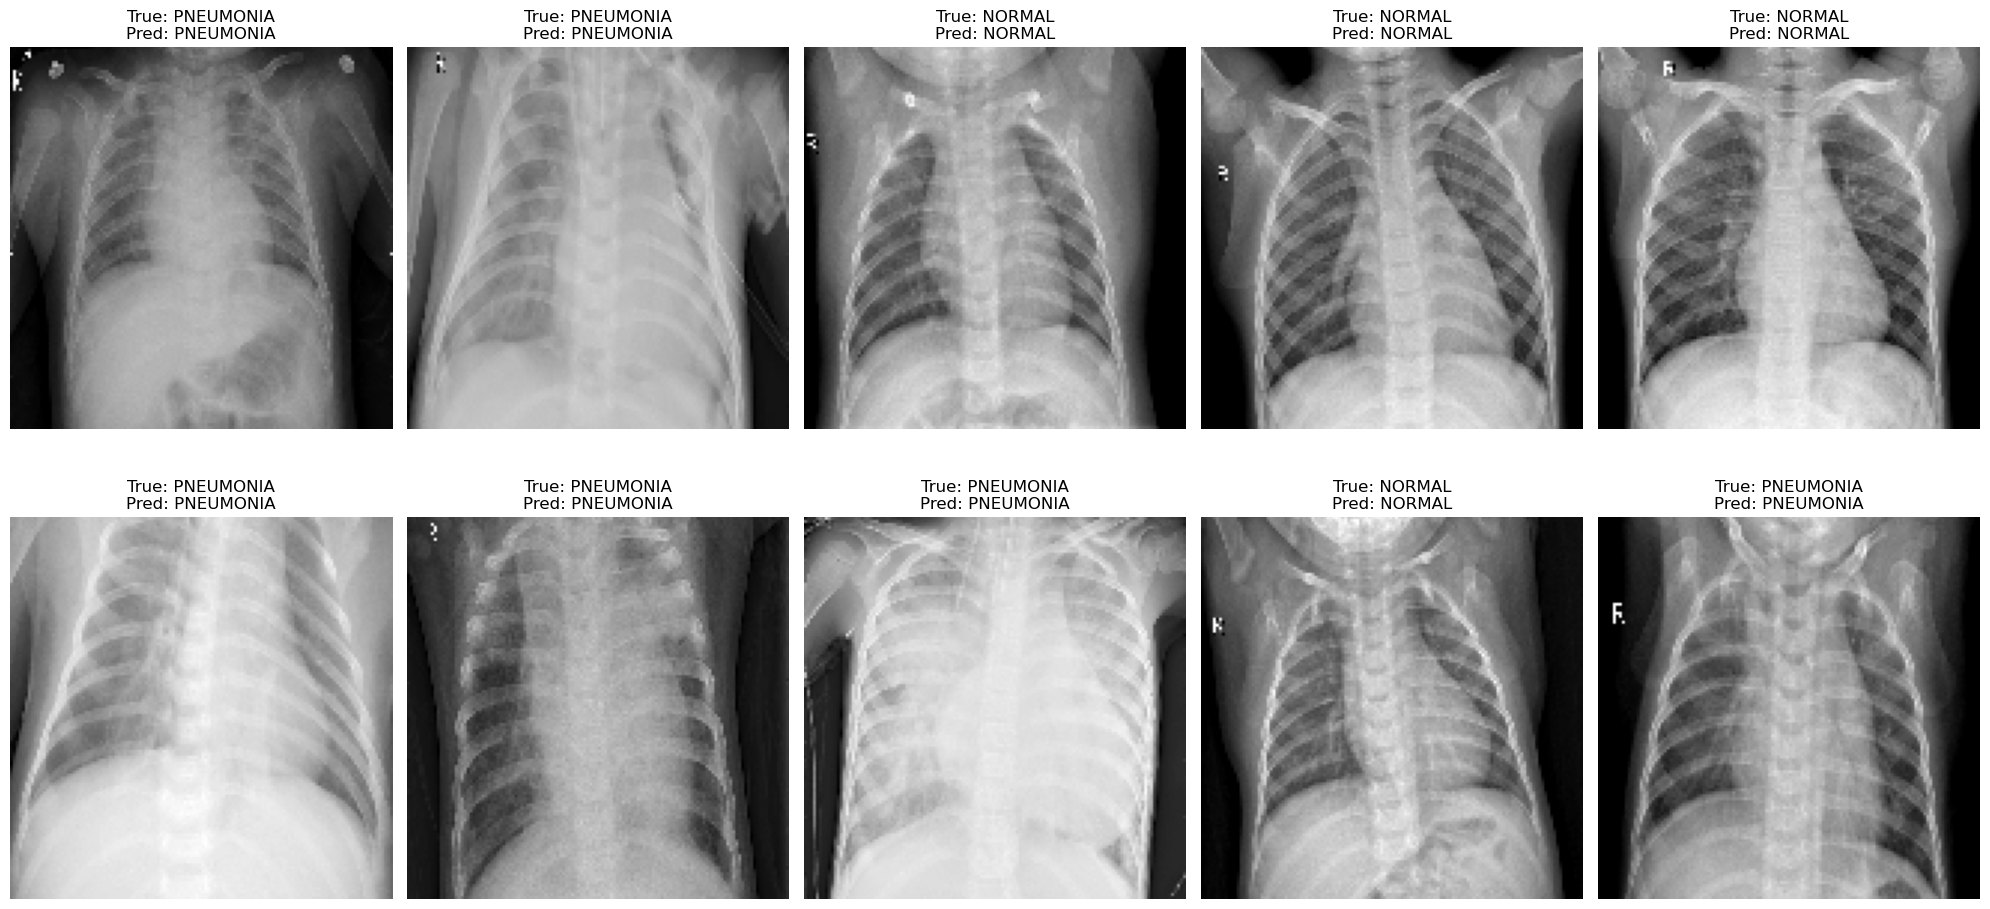

In [15]:
import matplotlib.pyplot as plt

# Function to display images along with true and predicted labels
def showImg(images, true_labels, classPred, categories, num_images=10):
    
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        
        plt.subplot(2, num_images // 2, i + 1)
        
        plt.imshow(images[i].reshape(visualScale, visualScale), cmap='gray')
        
        plt.title(f'True: {categories[true_labels[i]]}\nPred: {categories[classPred[i]]}')
        
        plt.axis('off')
        
    plt.tight_layout()
    
    plt.show()

# Get predictions and true labels
dataPred = model.predict(test_record)
classPred = np.argmax(dataPred, axis = 1)
true_labels = np.argmax(test_endGoal, axis = 1)

# Display some of the test images with their true and predicted labels
showImg(test_record, true_labels, classPred, varietySets)

#### Evaluating Underfitting in a Neural Network Model Using Tensorflow

This tool uses a straightforward neural network architecture to train and assess a basic underfitting model. After being loaded from.npy files, the data (record and endGoal) is divided into training and validation sets. One dense layer with softmax activation makes up the defined model (show_model_underfit).<br>
Training and Validation Metrics:<br>

Epochs: 10<br>
Training Accuracy: Initially around 84.42% and stabilizes at approximately 93.72%.<br>
Validation Accuracy: Initially around 91.30% and stabilizes at approximately 93.86%.<br>
Training Loss: Decreases from approximately 0.5899 to 0.1709.<br>
Validation Loss: Initially around 0.2188 and fluctuates between 0.2103 and 0.4133, ultimately stabilizing around 0.2279.<br>
These metrics indicate the model's performance on both the training and validation sets over the course of training epochs. The stabilization of accuracy and loss values suggests that the model is underfitting the data, failing to capture the underlying patterns and achieving suboptimal performance.

Epoch 1/10
147/147 [==============================] - 1s 4ms/step - loss: 0.5899 - accuracy: 0.8442 - val_loss: 0.2188 - val_accuracy: 0.9130
Epoch 2/10
147/147 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9127 - val_loss: 0.2103 - val_accuracy: 0.9215
Epoch 3/10
147/147 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9137 - val_loss: 0.2441 - val_accuracy: 0.9138
Epoch 4/10
147/147 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9116 - val_loss: 0.2211 - val_accuracy: 0.9317
Epoch 5/10
147/147 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9225 - val_loss: 0.2190 - val_accuracy: 0.9317
Epoch 6/10
147/147 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9257 - val_loss: 0.3299 - val_accuracy: 0.8976
Epoch 7/10
147/147 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9210 - val_loss: 0.4133 - val_accuracy: 0.8626
Epoch 

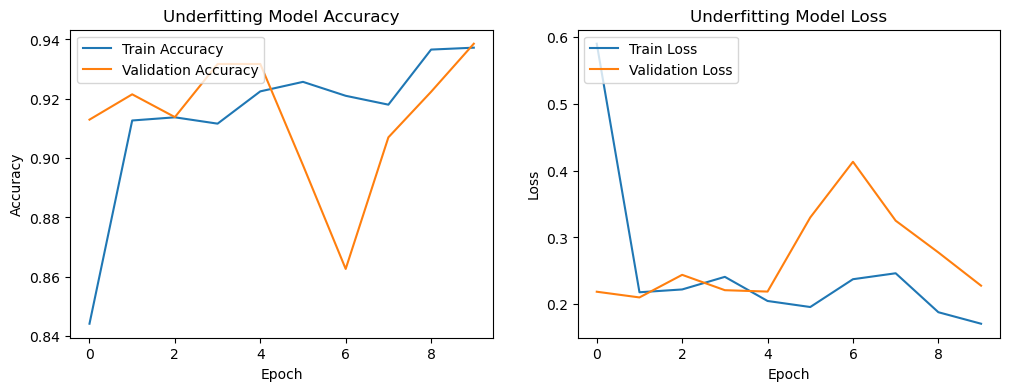

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load record and endGoal
record = np.load('dataChestXray.npy')
endGoal = np.load('targetChestXray.npy')

# Split data into training and validation sets
train_record, recordVal, train_endGoal, endGoalVal = train_test_split(record, endGoal, test_size = 0.2, random_state = 42)

# Define a simple underfitting model
show_model_underfit = Sequential([
    Flatten(input_shape = record.shape[1:]),
    Dense(2, activation = 'softmax')
])

show_model_underfit.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =  ['accuracy'])

# Train the model with validation data
show_underfitHist = show_model_underfit.fit(train_record, train_endGoal, epochs = 10, validation_data = (recordVal, endGoalVal))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(show_underfitHist.history['accuracy'], label = 'Train Accuracy')
plt.plot(show_underfitHist.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Underfitting Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(show_underfitHist.history['loss'], label = 'Train Loss')
plt.plot(show_underfitHist.history['val_loss'], label='Validation Loss')
plt.title('Underfitting Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')

plt.show()

#### Overfitting in a Convolutional Neural Network Model using Tensorflow

A complex convolutional neural network (CNN) model is created and trained by this code, with the potential to overfit the given dataset. To control overfitting, the model architecture consists of several convolutional layers, max-pooling layers, and dropout layers. Plotting the accuracy and loss data for the training and validation sets over several epochs subsequently helps to visualize the training process.<br>
Training and Validation Metrics:<br>

Epochs: 10<br>
Training Accuracy: Begins around 78.05% and steadily increases to approximately 95.54%.<br>
Validation Accuracy: Begins around 86.52% and rises to approximately 93.52%.<br>
Training Loss: Starts at approximately 0.5826 and decreases to around 0.1221.<br>
Validation Loss: Begins around 0.3141, fluctuates, and stabilizes around 0.1666.<br>

Throughout the training phase, these metrics show how the model performed on the training and validation sets. The model is probably overfitting the training data based on the divergence between the accuracy and loss values in training and validation, as well as the training metrics' constant improvement and the validation metrics' erratic behavior. Its performance on unseen validation data is relatively poorer, showing poor generalization ability, even though it achieves excellent accuracy on the training set.

Epoch 1/10
147/147 [==============================] - 232s 2s/step - loss: 0.5826 - accuracy: 0.7805 - val_loss: 0.3141 - val_accuracy: 0.8652
Epoch 2/10
147/147 [==============================] - 249s 2s/step - loss: 0.2524 - accuracy: 0.8992 - val_loss: 0.2704 - val_accuracy: 0.8848
Epoch 3/10
147/147 [==============================] - 260s 2s/step - loss: 0.2239 - accuracy: 0.9148 - val_loss: 0.1997 - val_accuracy: 0.9232
Epoch 4/10
147/147 [==============================] - 284s 2s/step - loss: 0.1951 - accuracy: 0.9268 - val_loss: 0.2595 - val_accuracy: 0.9061
Epoch 5/10
147/147 [==============================] - 281s 2s/step - loss: 0.1781 - accuracy: 0.9349 - val_loss: 0.1967 - val_accuracy: 0.9258
Epoch 6/10
147/147 [==============================] - 277s 2s/step - loss: 0.1594 - accuracy: 0.9398 - val_loss: 0.2038 - val_accuracy: 0.9206
Epoch 7/10
147/147 [==============================] - 279s 2s/step - loss: 0.1513 - accuracy: 0.9494 - val_loss: 0.1796 - val_accuracy: 0.9334

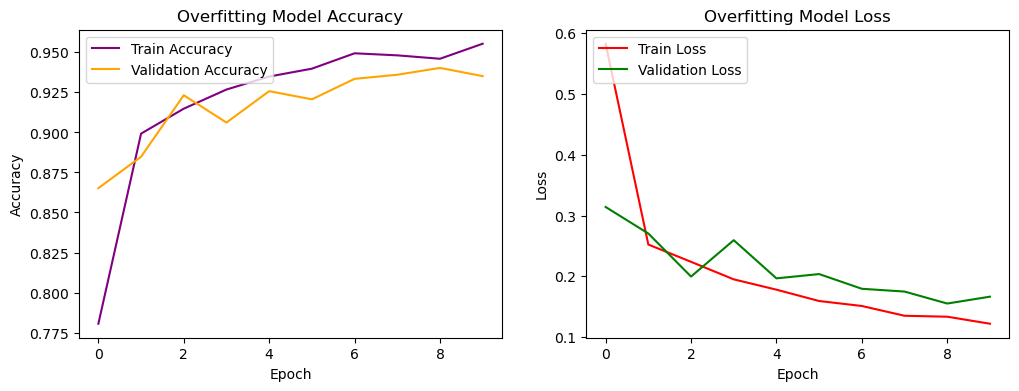

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data and target
record = np.load('dataChestXray.npy')
endGoal = np.load('targetChestXray.npy')

# Split data into training and validation sets
train_record, recordVal, train_endGoal, endGoalVal = train_test_split(record, endGoal, test_size = 0.2, random_state = 42)

# Define a complex overfitting model
show_model_overfit = Sequential([
    Conv2D(128, (3, 3), activation = 'relu', input_shape = record.shape[1:]),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.5),
    Conv2D(256, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(2, activation = 'softmax')
])

show_model_overfit.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model with validation data
show_overfitHist = show_model_overfit.fit(train_record, train_endGoal, epochs = 10, validation_data = (recordVal, endGoalVal))

# Plot training & validation accuracy values
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(show_overfitHist.history['accuracy'], label = 'Train Accuracy' , color = 'purple')
plt.plot(show_overfitHist.history['val_accuracy'], label = 'Validation Accuracy' , color = 'orange')
plt.title('Overfitting Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(show_overfitHist.history['loss'], label = 'Train Loss' , color = 'red')
plt.plot(show_overfitHist.history['val_loss'], label = 'Validation Loss', color = 'green')
plt.title('Overfitting Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')

plt.show()

Based on the provided information, it appears that the dataset performs better with the underfitting model. <br>

Here's why:<br>

Underfitting Model:<br>

Training Accuracy: Initially around 84.42% and stabilizes at approximately 93.72%.<br>
Validation Accuracy: Initially around 91.30% and stabilizes at approximately 93.86%.<br>
Overfitting Model:<br>

Training Accuracy: Starts at approximately 78.05% and increases to approximately 95.54%.<br>
Validation Accuracy: Begins around 86.52% and rises to approximately 93.52%.<br>

The overfitting model's validation accuracy is comparable to the underfitting model's, despite its slightly greater training accuracy. But the overfitting model is probably overfit, which means it might not generalize well to new data. However, as seen by its stable validation accuracy, the underfitting model shows higher generalization capacity despite having somewhat lower training accuracy. For this dataset, the underfitting model is therefore preferred.

#### Comparing Confusion Matrices of Underfitting and Overfitting Models

37/37 [==============================] - 15s 404ms/step


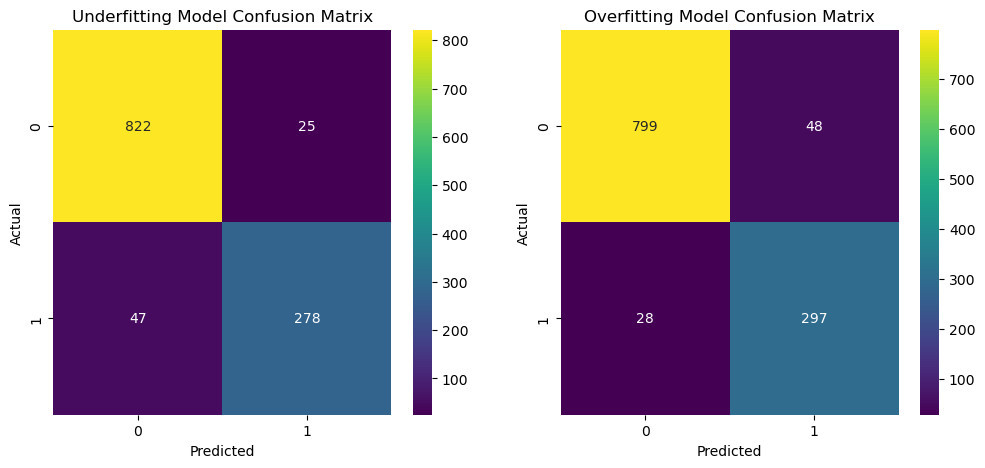

In [23]:
# Make predictions
Predunderfit = show_model_underfit.predict(recordVal)
Predoverfit = show_model_overfit.predict(recordVal)

# Convert predictions to class labels
PredlabUnderfit = np.argmax(Predunderfit, axis = 1)
PredlabOverfit = np.argmax(Predoverfit, axis = 1)

# Convert validation targets to class labels
val_labels = np.argmax(endGoalVal, axis = 1)

# Compute confusion matrices
cm_underfit = confusion_matrix(val_labels, PredlabUnderfit)
cm_overfit = confusion_matrix(val_labels, PredlabOverfit)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_underfit, annot = True, fmt = 'd', cmap = 'viridis')
plt.title('Underfitting Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_overfit, annot = True, fmt = 'd', cmap = 'viridis')
plt.title('Overfitting Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

### Inception V3


Google researchers have built a convolutional neural network architecture called InceptionV3. 2015 saw its debut. InceptionV3 was created to do picture classification problems with high accuracy and processing efficiency.

##### Importing necessary libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##### Loading the data and target

Import the Chest X-ray pictures (record) and the labels that go with them (endGoal) from NumPy arrays that have already been saved.
<br>
The picture data is in the record, and the labels (PNEUMONIA, NORMAL, etc.) are in the endGoal.

In [9]:
# Load data and target
record = np.load('dataChestXray.npy')
endGoal = np.load('targetChestXray.npy')

##### Data Splitting

Use an 80-20 split to divide the data into training and validation sets.
<br>
To validate the model's performance, use recordVal and endGoalVal instead of train_record and train_endGoal, which are used for training the model.

In [11]:
 # Split data into training and validation sets
train_record, recordVal, train_endGoal, endGoalVal = train_test_split(record, endGoal, test_size=0.2, random_state=42)


##### Convert to grayscale images

Since grayscale images are expected as input from three channels in InceptionV3, grayscale images are repeated in each channel.

In [12]:
# Convert to grayscale images 
train_record_rgb = np.repeat(train_record, 3, axis=-1)
recordVal_rgb = np.repeat(recordVal, 3, axis=-1)


##### Loading InceptionV3 Model

The goal is to load the pre-trained InceptionV3 model on ImageNet, with the exception of the uppermost fully linked layers.
<br>
The model serves as an extractor of features. For the resized images, the input shape is set to (128, 128, 3).

In [13]:
# Load the InceptionV3 model, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


##### Building and Compiling the Model

Compiling the model after adding custom layers to the InceptionV3 base model.

In [14]:
# Add new layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [15]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

##### Training the model

Using the training data, train the model for 10 epochs and validate on the validation set.
<br>
The output shows the accuracy and loss for every training and validation period.

In [16]:
# Train the model with validation data
trainHist = model.fit(train_record_rgb, train_endGoal, epochs=10, validation_data=(recordVal_rgb, endGoalVal))

Epoch 1/10
147/147 [==============================] - 232s 2s/step - loss: 0.1849 - accuracy: 0.9323 - val_loss: 240.3726 - val_accuracy: 0.8643
Epoch 2/10
147/147 [==============================] - 227s 2s/step - loss: 0.1197 - accuracy: 0.9590 - val_loss: 507.0882 - val_accuracy: 0.7705
Epoch 3/10
147/147 [==============================] - 232s 2s/step - loss: 0.1737 - accuracy: 0.9434 - val_loss: 101.5583 - val_accuracy: 0.7389
Epoch 4/10
147/147 [==============================] - 250s 2s/step - loss: 0.2076 - accuracy: 0.9302 - val_loss: 1.1795 - val_accuracy: 0.6988
Epoch 5/10
147/147 [==============================] - 277s 2s/step - loss: 0.1382 - accuracy: 0.9541 - val_loss: 0.2088 - val_accuracy: 0.9249
Epoch 6/10
147/147 [==============================] - 296s 2s/step - loss: 0.1167 - accuracy: 0.9590 - val_loss: 0.1297 - val_accuracy: 0.9497
Epoch 7/10
147/147 [==============================] - 309s 2s/step - loss: 0.1014 - accuracy: 0.9703 - val_loss: 0.1618 - val_accuracy: 

In the output above,
<br>
Epoch 1/10: the validation accuracy is lower at 86.43%, while training accuracy begins off high at 93.23%.
<br>
Epoch 10/10: 97.18% is the final training accuracy, and 93.26% is the validation accuracy.
<br>
Over time, the model gets better; variations in validation accuracy point to overfitting or problems with generalization.


##### Plotting Accuracy and Loss

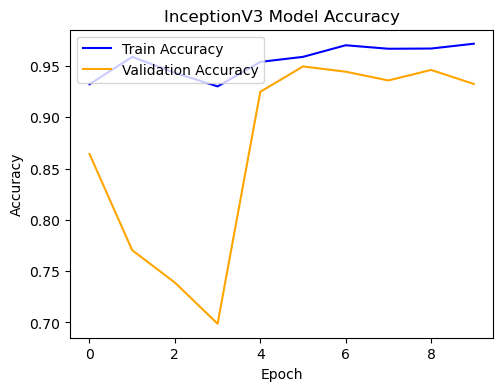

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trainHist.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(trainHist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

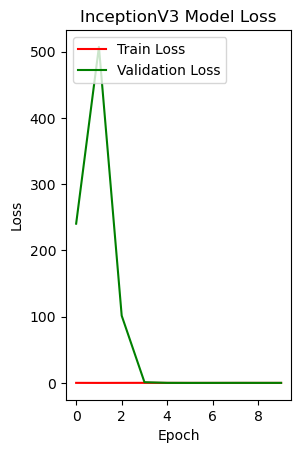

In [18]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trainHist.history['loss'], label='Train Loss', color='red')
plt.plot(trainHist.history['val_loss'], label='Validation Loss', color='green')
plt.title('InceptionV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

##### Evaluate the Model

In [19]:
# Evaluate the model
print(model.evaluate(recordVal_rgb, endGoalVal))


37/37 [==============================] - 15s 408ms/step - loss: 0.1821 - accuracy: 0.9326
[0.18211808800697327, 0.9325938820838928]


After training, assess the model using the validation set.
<br>
Results:
<br>
Loss: 0.1821 based on validation data.
<br>
93.26% accuracy was achieved using validation data.

In [20]:
# Make predictions
dataPred = model.predict(recordVal_rgb)
classPred = np.argmax(dataPred, axis=1)
true_labels = np.argmax(endGoalVal, axis=1)


37/37 [==============================] - 15s 386ms/step


##### Visualize Confusion Matrix

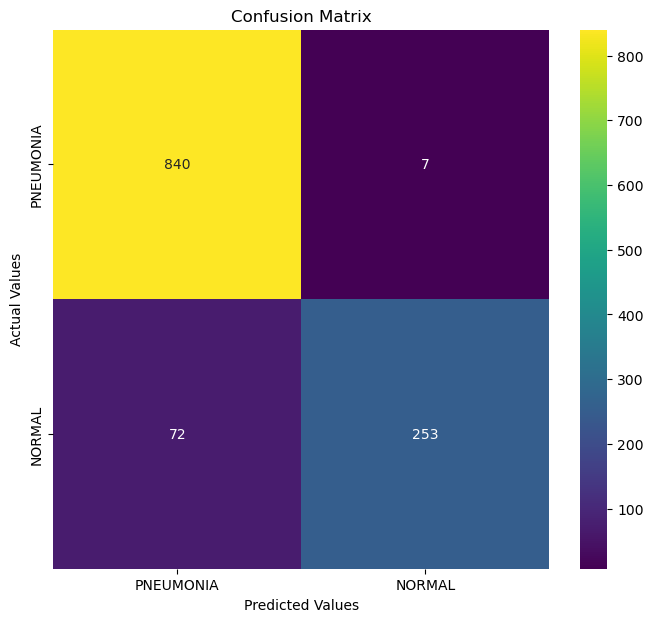

In [21]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_mat = confusion_matrix(true_labels, classPred)

plt.figure(figsize=(8, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=['PNEUMONIA', 'NORMAL'], yticklabels=['PNEUMONIA', 'NORMAL'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

In [22]:
#print the classification report
print(classification_report(true_labels, classPred, target_names=['PNEUMONIA', 'NORMAL']))

              precision    recall  f1-score   support

   PNEUMONIA       0.92      0.99      0.96       847
      NORMAL       0.97      0.78      0.86       325

    accuracy                           0.93      1172
   macro avg       0.95      0.89      0.91      1172
weighted avg       0.94      0.93      0.93      1172



Precision: Measures the accuracy of positive predictions.
<br>
PNEUMONIA: 92%, NORMAL: 97%
<br>
Recall: Measures the ability to capture all positive samples.
<br>
PNEUMONIA: 99%, NORMAL: 78%
<br>
F1-Score: Harmonic mean of precision and recall.
<br>
PNEUMONIA: 96%, NORMAL: 86%
<br>
Accuracy: 93% overall accuracy.

##### Visualising the images

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with true and predicted labels
def showImg(images, true_labels, classPred, categories, num_images=10):
    
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        
        plt.subplot(2, num_images // 2, i + 1)
        
        plt.imshow(images[i].reshape(visualScale, visualScale), cmap='gray')
        
        plt.title(f'True: {categories[true_labels[i]]}\nPred: {categories[classPred[i]]}')
        
        plt.axis('off')
        
    plt.tight_layout()
    
    plt.show()

# Get predictions and true labels
dataPred = model.predict(test_record)
classPred = np.argmax(dataPred, axis = 1)
true_labels = np.argmax(test_endGoal, axis = 1)

# Display some of the test images with their true and predicted labels
showImg(test_record, true_labels, classPred, varietySets)

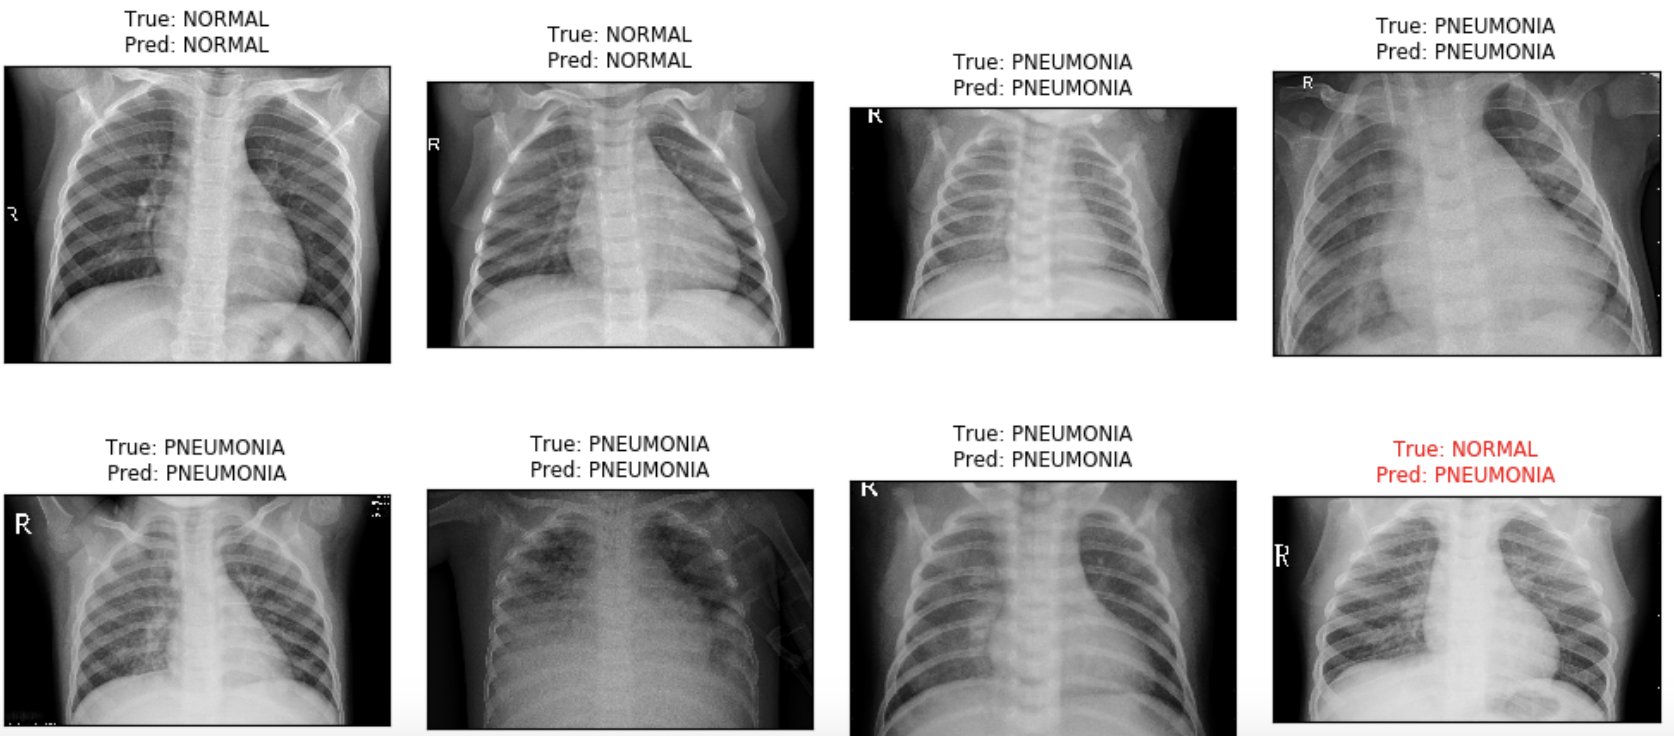

### DenseNet121 Model

Densely Connected Convolutional Network is the name given to an architecture in which every layer in a DenseNet is connected to every other layer. Each layer uses the feature maps of all the layers that come before it as inputs, and each layer that comes after it uses its own feature maps as inputs.
<br>
DenseNets connect each layer to all other layers in essence. This is the central, incredibly potent idea. A DenseNet layer receives its input as a concatenation of feature maps from layers before it.

##### Import libraries

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##### Load Data and Targets, Data Splitting & Convert images to grayscale

In [29]:
# Load data and target
record = np.load('dataChestXray.npy')
endGoal = np.load('targetChestXray.npy')

# Split data into training and validation sets
train_record, recordVal, train_endGoal, endGoalVal = train_test_split(record, endGoal, test_size=0.2, random_state=42)

# Convert grayscale images to 3-channel images
train_record_rgb = np.repeat(train_record, 3, axis=-1)
recordVal_rgb = np.repeat(recordVal, 3, axis=-1)

##### Loading DenseNet121 Model, Building and Compiling the model

Load the pre-trained DenseNet121 model from ImageNet, making sure to remove the uppermost fully linked layers.
<br>
The model serves as an extractor of features. For the resized photos, the input shape is set to (128, 128, 3).
<br>
Compile the model after adding custom layers to the DenseNet121 basic model.

In [30]:
# Load the DenseNet121 model, excluding the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add new layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming binary classification (Pneumonia/Normal)
])

29084464/29084464 [==============================] - 4s 0us/step


In [31]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

##### Training the model

In [32]:
trainHist = model.fit(train_record_rgb, train_endGoal, epochs=10, validation_data=(recordVal_rgb, endGoalVal))


Epoch 1/10
147/147 [==============================] - 428s 3s/step - loss: 0.1674 - accuracy: 0.9443 - val_loss: 0.5806 - val_accuracy: 0.9215
Epoch 2/10
147/147 [==============================] - 421s 3s/step - loss: 0.1051 - accuracy: 0.9656 - val_loss: 0.2915 - val_accuracy: 0.9249
Epoch 3/10
147/147 [==============================] - 404s 3s/step - loss: 0.0928 - accuracy: 0.9699 - val_loss: 0.1658 - val_accuracy: 0.9505
Epoch 4/10
147/147 [==============================] - 449s 3s/step - loss: 0.0705 - accuracy: 0.9746 - val_loss: 0.3536 - val_accuracy: 0.9130
Epoch 5/10
147/147 [==============================] - 549s 4s/step - loss: 0.0633 - accuracy: 0.9793 - val_loss: 0.2367 - val_accuracy: 0.9309
Epoch 6/10
147/147 [==============================] - 528s 4s/step - loss: 0.0591 - accuracy: 0.9787 - val_loss: 0.2008 - val_accuracy: 0.9445
Epoch 7/10
147/147 [==============================] - 517s 4s/step - loss: 0.0571 - accuracy: 0.9793 - val_loss: 0.7905 - val_accuracy: 0.8481

Using the training data, train the model for ten epochs and validate it using the validation set.
<br>
Output: 
<br>
Epoch 1/10: Validation accuracy is lower at 92.15% than training accuracy, which starts at 94.43%.
<br>
Epoch 10/10: Validation accuracy dramatically decreases to 58.53%, whereas final training accuracy is 98.25%.
<br>
Interpretation: Although the model performs well at first, it may have overfitted as validation accuracy gradually declines.

##### Evaluate the Model

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(recordVal_rgb, endGoalVal)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

37/37 [==============================] - 26s 701ms/step - loss: 3.3455 - accuracy: 0.5853
Validation Loss: 3.345461368560791
Validation Accuracy: 0.585324227809906


Validation Loss: 3.3455—an extremely high value.
<br>
58.53% is the validation accuracy, a much lower percentage than the training accuracy.
<br>
Interpretation: Overfitting during training is probably the reason for the model's difficulty with generalization.

##### Plot Training & Validation Accuracy and Loss

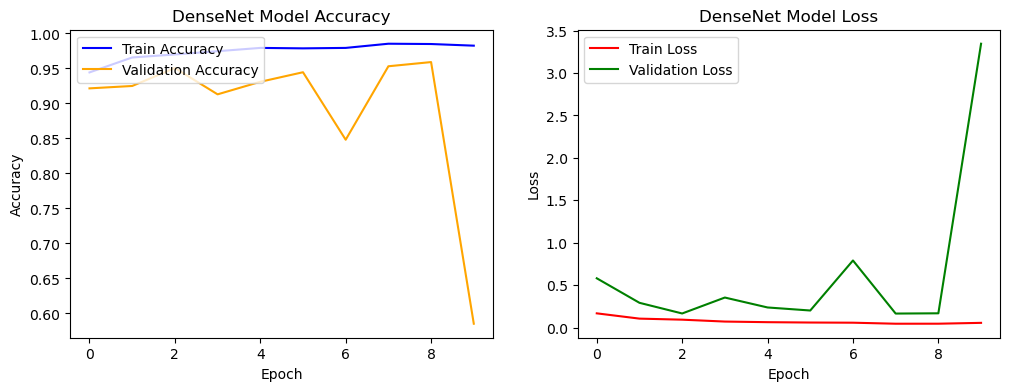

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trainHist.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(trainHist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('DenseNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trainHist.history['loss'], label='Train Loss', color='red')
plt.plot(trainHist.history['val_loss'], label='Validation Loss', color='green')
plt.title('DenseNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

##### Make Predictions

Generate predictions using the validation set.

In [35]:
# Make predictions
dataPred = model.predict(recordVal_rgb)
classPred = np.argmax(dataPred, axis=1)
true_labels = np.argmax(endGoalVal, axis=1)

37/37 [==============================] - 24s 599ms/step


##### Compute and Visualize Confusion Matrix

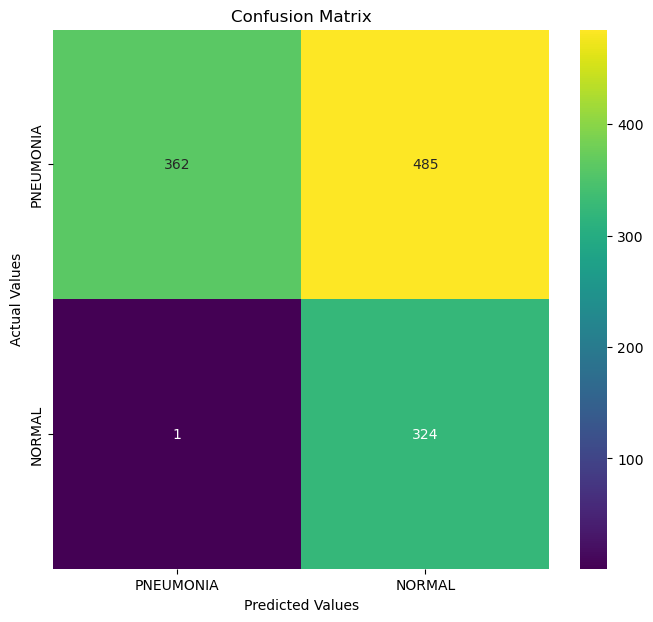

In [36]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_mat = confusion_matrix(true_labels, classPred)

plt.figure(figsize=(8, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=['PNEUMONIA', 'NORMAL'], yticklabels=['PNEUMONIA', 'NORMAL'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

In [37]:
#print the classification report
print(classification_report(true_labels, classPred, target_names=['PNEUMONIA', 'NORMAL']))


              precision    recall  f1-score   support

   PNEUMONIA       1.00      0.43      0.60       847
      NORMAL       0.40      1.00      0.57       325

    accuracy                           0.59      1172
   macro avg       0.70      0.71      0.58      1172
weighted avg       0.83      0.59      0.59      1172



Output:
<br>
Precision: PNEUMONIA: 100% , NORMAL: 40%
<br>
Recall: PNEUMONIA: 43% , NORMAL: 100%
<br>
F1-Score: PNEUMONIA: 60% , NORMAL: 57%
<br>
Accuracy: 59% overall accuracy.
<br>
Interpretation: The model is highly biased towards predicting PNEUMONIA, leading to poor performance in correctly identifying NORMAL cases. The low F1-score for both classes suggests that the model’s performance is imbalanced.

##### Visualise the images

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with true and predicted labels
def showImg(images, true_labels, classPred, categories, num_images=10):
    
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        
        plt.subplot(2, num_images // 2, i + 1)
        
        plt.imshow(images[i].reshape(visualScale, visualScale), cmap='gray')
        
        plt.title(f'True: {categories[true_labels[i]]}\nPred: {categories[classPred[i]]}')
        
        plt.axis('off')
        
    plt.tight_layout()
    
    plt.show()

# Get predictions and true labels
dataPred = model.predict(test_record)
classPred = np.argmax(dataPred, axis = 1)
true_labels = np.argmax(test_endGoal, axis = 1)

# Display some of the test images with their true and predicted labels
showImg(test_record, true_labels, classPred, varietySets)

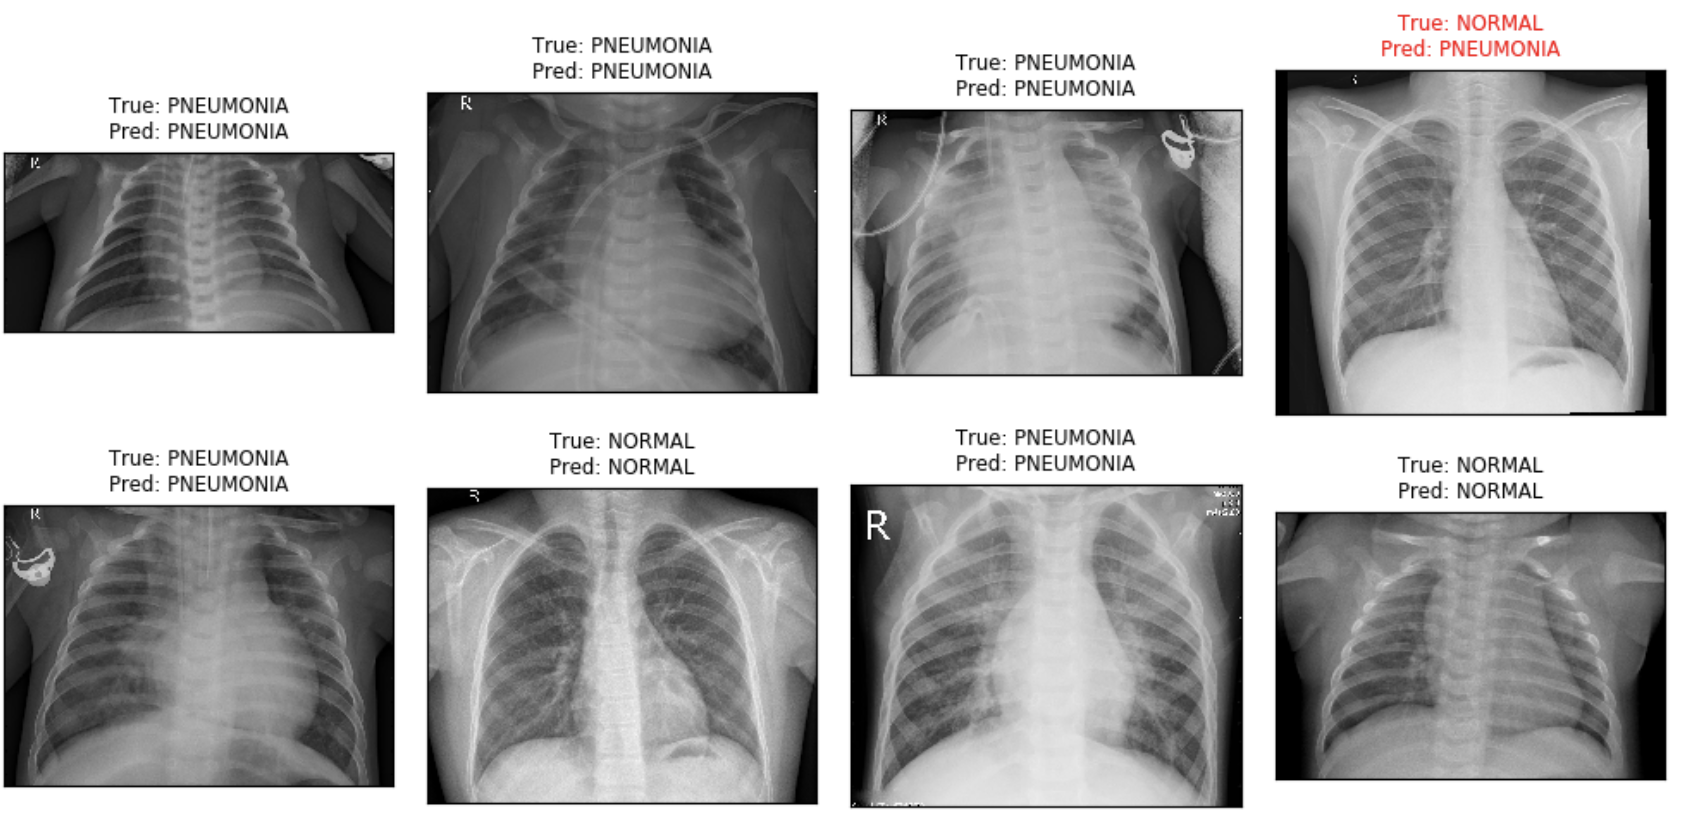

## Inception V3 with Transfer Learning

Reusing a pre-trained model on a new model, transfer learning uses a minimal amount of dataset to save training time and boost performance. It has become one of the main approaches utilized in Inception V3 for image categorization.

##### Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-08-24 18:05:27.570397: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### Data Loading, Splitting and Preprocessing

In [2]:
# Load data and target
record = np.load('dataChestXray.npy')
endGoal = np.load('targetChestXray.npy')

# Split data into training and validation sets
train_record, recordVal, train_endGoal, endGoalVal = train_test_split(record, endGoal, test_size=0.2, random_state=42)

# Convert grayscale images to 3-channel images
train_record_rgb = np.repeat(train_record, 3, axis=-1)
recordVal_rgb = np.repeat(recordVal, 3, axis=-1)

##### Load the InceptionV3 Model with Transfer Learning

Adding your own fully linked layers to the InceptionV3 model by loading it with pre-trained weights from ImageNet, omitting the top layers.

In [3]:
# Load the InceptionV3 model, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming binary classification (Pneumonia/Normal)
])

##### Compile the Model

In [4]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

##### Training the Model

Make use of your validation and training data to train the model. Only the new layers will be trained because the layers in the base model are locked.

In [5]:
trainHist = model.fit(train_record_rgb, train_endGoal, epochs=10, validation_data=(recordVal_rgb, endGoalVal))

Epoch 1/10
147/147 [==============================] - 66s 431ms/step - loss: 0.4022 - accuracy: 0.8698 - val_loss: 0.2639 - val_accuracy: 0.8976
Epoch 2/10
147/147 [==============================] - 67s 453ms/step - loss: 0.2183 - accuracy: 0.9178 - val_loss: 0.2140 - val_accuracy: 0.9138
Epoch 3/10
147/147 [==============================] - 74s 502ms/step - loss: 0.1935 - accuracy: 0.9306 - val_loss: 0.2032 - val_accuracy: 0.9172
Epoch 4/10
147/147 [==============================] - 70s 478ms/step - loss: 0.1833 - accuracy: 0.9272 - val_loss: 0.2054 - val_accuracy: 0.9155
Epoch 5/10
147/147 [==============================] - 70s 478ms/step - loss: 0.1711 - accuracy: 0.9349 - val_loss: 0.1951 - val_accuracy: 0.9172
Epoch 6/10
147/147 [==============================] - 72s 491ms/step - loss: 0.1662 - accuracy: 0.9377 - val_loss: 0.2053 - val_accuracy: 0.9130
Epoch 7/10
147/147 [==============================] - 72s 492ms/step - loss: 0.1704 - accuracy: 0.9351 - val_loss: 0.2141 - val_ac

Using the training data, train the model for ten epochs, assessing it on the validation data at the end of each epoch.
<br>
Results:
<br>
Validation accuracy for Epoch 1 was 89.76%.
<br>
Validation accuracy for Epoch 10 was 92.75%.

##### Unfreeze Some Layers (Optional Fine-Tuning)

We can unfreeze parts of the InceptionV3 model's later layers and fine-tune them in addition to the additional layers to increase performance even further.

In [6]:
# Unfreeze the last few layers of the InceptionV3 model
for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
trainHist_fine = model.fit(train_record_rgb, train_endGoal, epochs=5, validation_data=(recordVal_rgb, endGoalVal))

Epoch 1/5
147/147 [==============================] - 82s 539ms/step - loss: 0.1933 - accuracy: 0.9345 - val_loss: 0.2026 - val_accuracy: 0.9198
Epoch 2/5
147/147 [==============================] - 80s 545ms/step - loss: 0.1618 - accuracy: 0.9447 - val_loss: 0.1849 - val_accuracy: 0.9309
Epoch 3/5
147/147 [==============================] - 83s 562ms/step - loss: 0.1347 - accuracy: 0.9543 - val_loss: 0.1780 - val_accuracy: 0.9343
Epoch 4/5
147/147 [==============================] - 82s 559ms/step - loss: 0.1215 - accuracy: 0.9609 - val_loss: 0.1805 - val_accuracy: 0.9369
Epoch 5/5
147/147 [==============================] - 82s 558ms/step - loss: 0.1022 - accuracy: 0.9678 - val_loss: 0.1769 - val_accuracy: 0.9377


Procedure: 
<br>
To fine-tune, unfreeze the final 30 layers of the base model.
<br>
Recompile the model utilizing a 1e-5 learning rate.
<br>
Go on with your training for five more epochs.
<br>
Final Product: 
<br>
Fine-Tuning Output: 91.98% validation accuracy for the first epoch.
<br>
Validation accuracy for Epoch 5 was 93.77%.

##### Model Evaluation

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(recordVal_rgb, endGoalVal)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

37/37 [==============================] - 14s 384ms/step - loss: 0.1769 - accuracy: 0.9377
Validation Loss: 0.17690148949623108
Validation Accuracy: 0.9377133250236511


Validation Loss: 0.1769
<br>
Validation Accuracy: 93.77%

##### Plotting Graphs

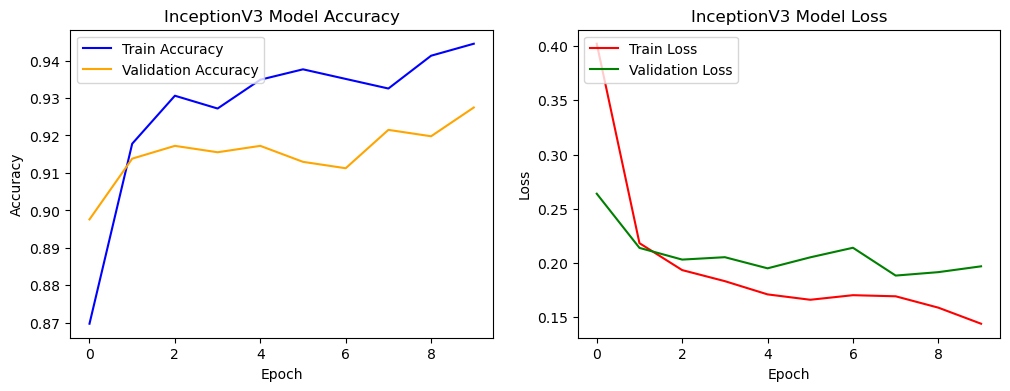

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trainHist.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(trainHist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trainHist.history['loss'], label='Train Loss', color='red')
plt.plot(trainHist.history['val_loss'], label='Validation Loss', color='green')
plt.title('InceptionV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

In [9]:
# Make predictions
dataPred = model.predict(recordVal_rgb)
classPred = np.argmax(dataPred, axis=1)
true_labels = np.argmax(endGoalVal, axis=1)

37/37 [==============================] - 14s 357ms/step


##### Confusion Matrix

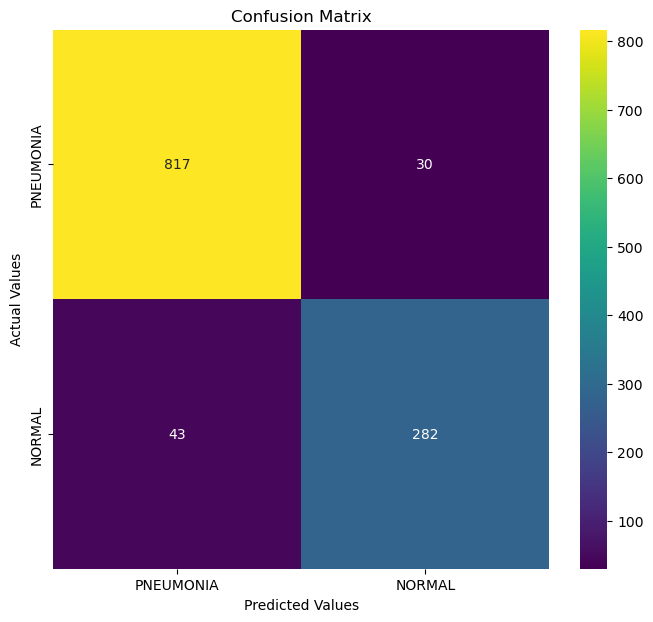

In [10]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_mat = confusion_matrix(true_labels, classPred)

plt.figure(figsize=(8, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=['PNEUMONIA', 'NORMAL'], yticklabels=['PNEUMONIA', 'NORMAL'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

In [11]:
#print the classification report
print(classification_report(true_labels, classPred, target_names=['PNEUMONIA', 'NORMAL']))

              precision    recall  f1-score   support

   PNEUMONIA       0.95      0.96      0.96       847
      NORMAL       0.90      0.87      0.89       325

    accuracy                           0.94      1172
   macro avg       0.93      0.92      0.92      1172
weighted avg       0.94      0.94      0.94      1172



<b> Output -  </b>
<br>
Precision: PNEUMONIA: 95% , NORMAL: 90%
<br>
Recall: PNEUMONIA: 96% , NORMAL: 87%
<br>
F1-Score: PNEUMONIA: 96% , NORMAL: 89%
<br>
Accuracy: 94% overall accuracy.

##### Visualise the images

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with true and predicted labels
def showImg(images, true_labels, classPred, categories, num_images=10):
    
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        
        plt.subplot(2, num_images // 2, i + 1)
        
        plt.imshow(images[i].reshape(visualScale, visualScale), cmap='gray')
        
        plt.title(f'True: {categories[true_labels[i]]}\nPred: {categories[classPred[i]]}')
        
        plt.axis('off')
        
    plt.tight_layout()
    
    plt.show()

# Get predictions and true labels
dataPred = model.predict(test_record)
classPred = np.argmax(dataPred, axis = 1)
true_labels = np.argmax(test_endGoal, axis = 1)

# Display some of the test images with their true and predicted labels
showImg(test_record, true_labels, classPred, varietySets)

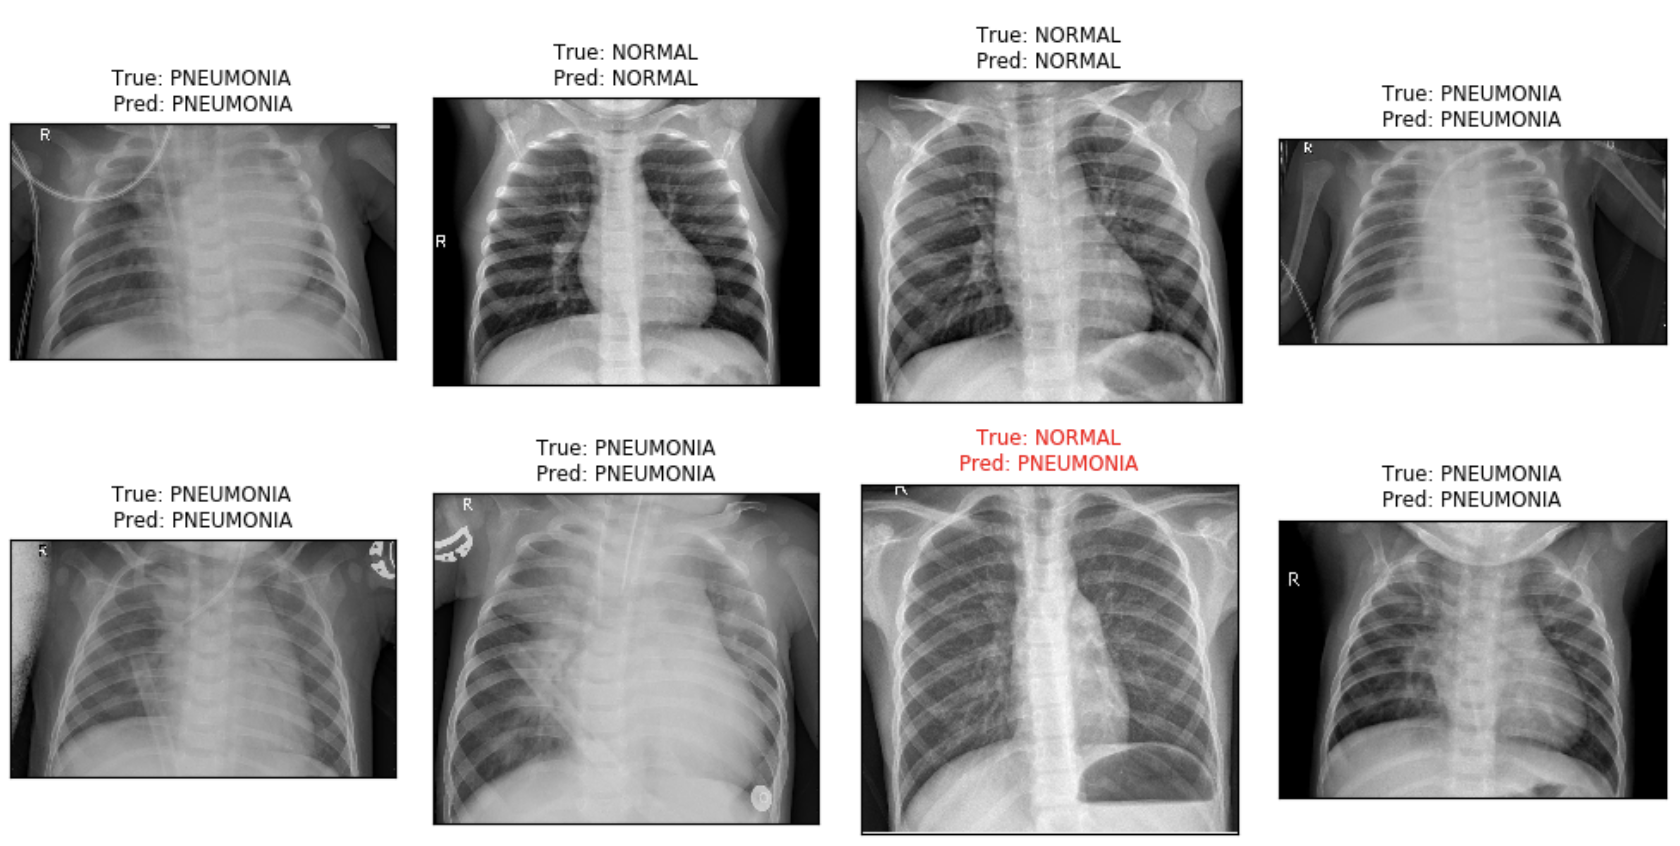

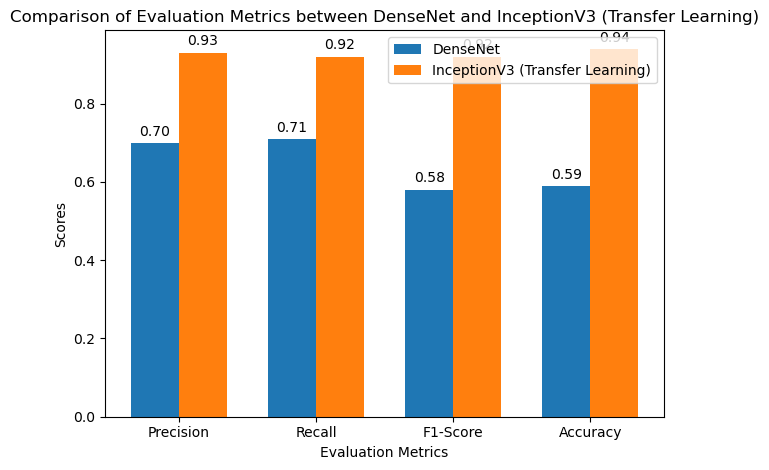

In [12]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

densenet_values = [0.70, 0.71, 0.58, 0.59]  
inception_values = [0.93, 0.92, 0.92, 0.94]  

# label locations
x = np.arange(len(metrics))

# the breadth between the bars the bars
breadth = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - breadth/2, densenet_values, breadth, label='DenseNet')
rects2 = ax.bar(x + breadth/2, inception_values, breadth, label='InceptionV3 (Transfer Learning)')

# Labelling the axis ans giving titles to the bar graph
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics between DenseNet and InceptionV3 (Transfer Learning)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Label bars with the given value
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The InceptionV3 with transfer learning model was the better performer among the three models evaluated because  -
<br>

Accuracy: With a 93.77% accuracy rate, the InceptionV3 with transfer learning outperformed DenseNet121 (58.53%) by a substantial margin. The accuracy of the regular InceptionV3 model was 93.26%.
<br>

Precision and Recall: The InceptionV3 with transfer learning achieved a high F1-score of 0.96 for the 'PNEUMONIA' category, with a precision of 0.95 and a recall of 0.96. This suggests that the model was highly precise in its predictions (high precision) and excellent at identifying actual cases of pneumonia (high recall). The recall for 'NORMAL' was higher in the standard InceptionV3, but it was much lower at 0.43 for 'PNEUMONIA' in DenseNet121.


### Code References - 


1. Adityavp. (n.d.). CM3070_FYP/CM3070_Final_Year_Project.ipynb at main · adityavp99/CM3070_FYP. GitHub. https://github.com/adityavp99/CM3070_FYP/blob/main/CM3070_Final_Year_Project.ipynb
<br>

2. Zhenshyuan. (n.d.). CM3070-FYP/final code.ipynb at main · zhenshyuan/CM3070-FYP. GitHub. https://github.com/zhenshyuan/CM3070-FYP/blob/main/final%20code.ipynb
<br>

3. CodersArts. (2022, November 27). Brain tumor Detection using Deep Learning | Step by step solution | Deep Learning Project [Video]. YouTube. https://www.youtube.com/watch?v=juJYmc4vrWU
<br>

4. Wisdom ML. (2020, September 9). Heart Disease Prediction using Machine Learning | Machine Learning Projects in python | Project #2 [Video]. YouTube. https://www.youtube.com/watch?v=D7LvV-qye1Y
<br>

5. Hitashu. (n.d.). Chest-XRay-Predictions/Chest_Xray_CNN.ipynb at master · hitashu/Chest-XRay-Predictions. GitHub. https://github.com/hitashu/Chest-XRay-Predictions/blob/master/Chest_Xray_CNN.ipynb
<br>

6. KNOWLEDGE DOCTOR. (2020, August 23). PNEUMONIA Detection using deep learning in TensorFlow, KeRas & Python | KNOWLEDGE DOCTOR | [Video]. YouTube. https://www.youtube.com/watch?v=tAvZVPmdSEk
<br>

7. AI with Thakshila. (2020, April 23). Pneumonia Analysis using Convolutional Neural Networks, Tensorflow, Keras and Python [Video]. YouTube. https://www.youtube.com/watch?v=ukNnp_EUWdo
<br>

8. Ayodhyadhameesha. (n.d.). Pneumonia-prediction-using-ChestXrays-by-CNN/Pneumonia_predictions_using__XRays(CNN)_Preparing_dataset.ipynb at master · ayodhyadhameesha/Pneumonia-prediction-using-ChestXrays-by-CNN. GitHub. https://github.com/ayodhyadhameesha/Pneumonia-prediction-using-ChestXrays-by-CNN/blob/master/Pneumonia_predictions_using__XRays(CNN)_Preparing_dataset.ipynb
<br>

9. Anjanatiha. (n.d.). Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning/code/Detection of Pneumonia from Chest X-Ray Images 1.0.0.3.ipynb at master · anjanatiha/Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning. GitHub. https://github.com/anjanatiha/Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning/blob/master/code/Detection%20of%20Pneumonia%20from%20Chest%20X-Ray%20Images%201.0.0.3.ipynb
<br>

10. Floxus. (2022, November 6). [LIVE] |  CREATE A PNEUMONIA DETECTION MODEL | Learning CNN techniques | FLOXUS [Video]. YouTube. https://www.youtube.com/watch?v=5nVWENPbas0